## **Player Market Value Prediction**

## ***Imports***


In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### ***Reading CSV***

In [138]:
players = pd.read_csv("football.csv")

### ***Dataset information***

In [139]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [140]:
players.head(5)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


### ***Statistical Description***

In [141]:
players.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [142]:
players.nunique(axis=0)

name            461
club             20
age              22
position         13
position_cat      4
market_value     48
page_views      389
fpl_value        17
fpl_sel         113
fpl_points      153
region            4
nationality      61
new_foreign       2
age_cat           6
club_id          20
big_club          2
new_signing       2
dtype: int64

In [143]:
missing_val_count_by_column = (players.isnull().sum())
missing_val_count_by_column

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

### ***No of Players in every club and position***

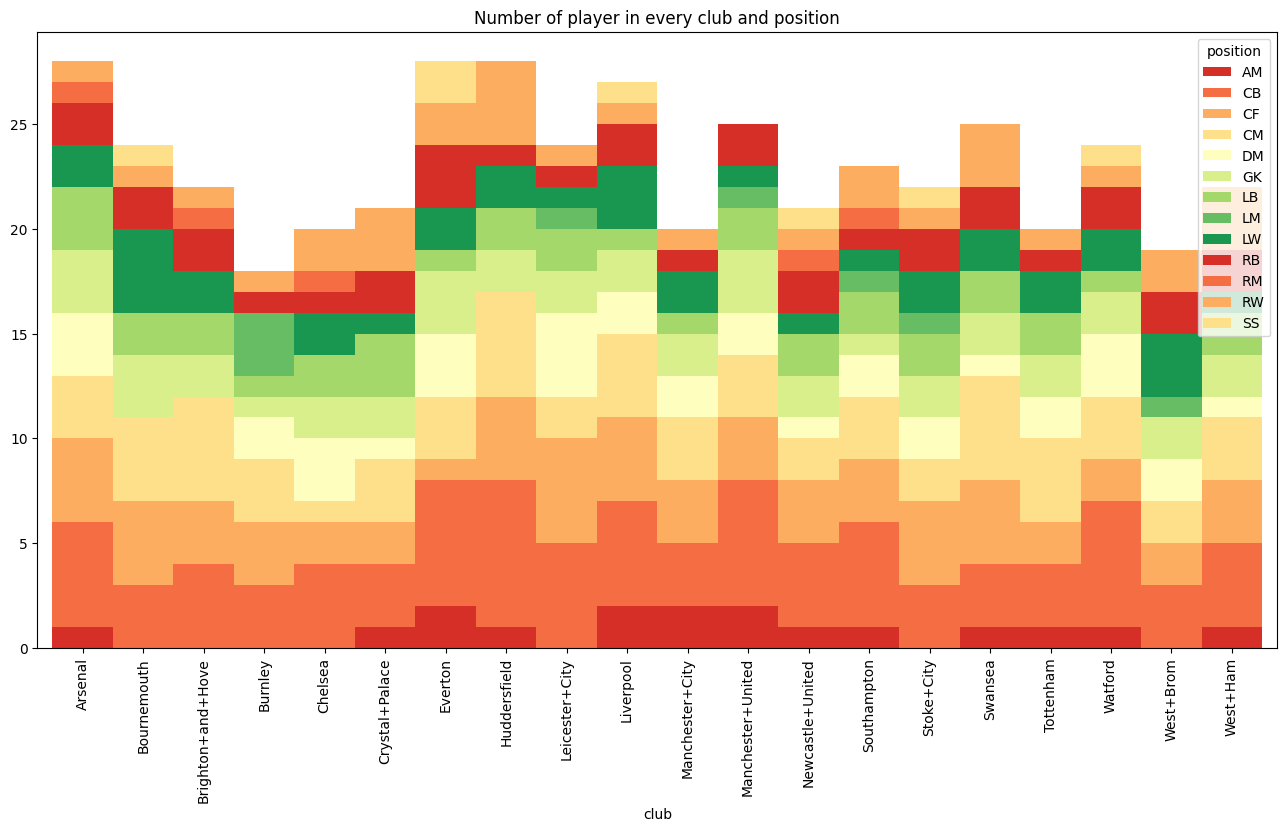

In [144]:
pd.crosstab(players.club,players.position).plot.bar(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.title('Number of player in every club and position')
plt.show()

**Observation:**

Bar graph above shows how many players are there in every clubs and the variation of players position. 
    - x axis represents the clubs name
    - y-axis represent the total number of players.

The variation of player position are distinguish by different color in each bars. the colors code for players 
position is explained on the righ side of the chart.

**Arsenal , Everton , and Huddersfield have the biggest number of players with 28 players .**
**Burnley has the lowest number of players with 18 players.**


### ***Distribution of Player's age***

C:\Users\Prime\AppData\Local\Temp\ipykernel_17792\2144395192.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(players['age'], color = "Red")


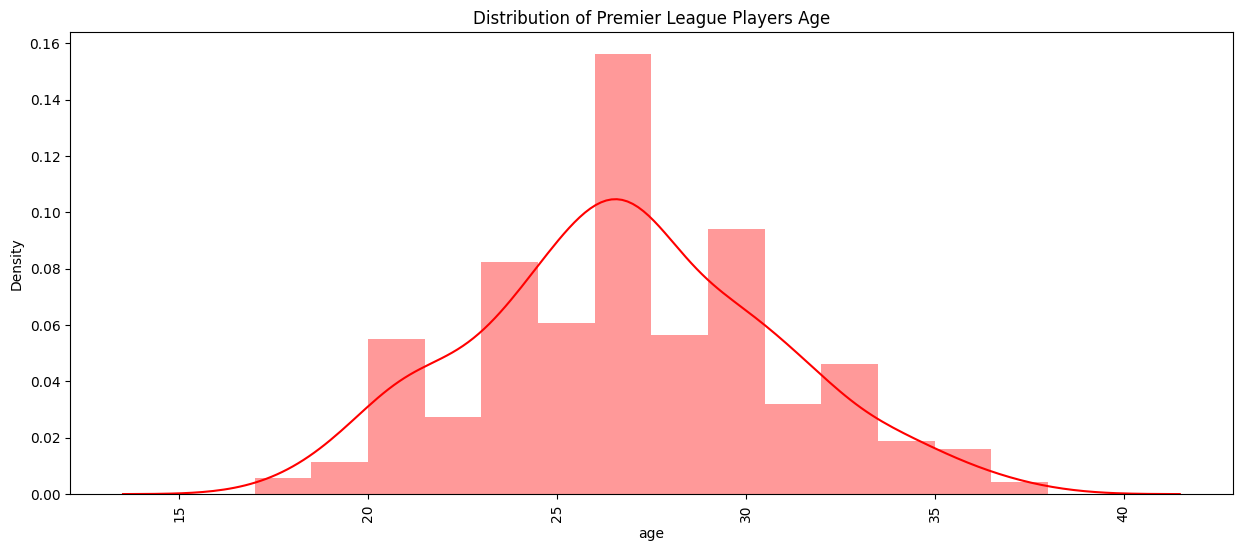

In [145]:
plt.subplots(figsize=(15,6))
sns.set_color_codes()
sns.distplot(players['age'], color = "Red")
plt.xticks(rotation=90)
plt.title(r'Distribution of Premier League Player''s Age')
plt.show()

### ***Top 10 Player Market Values***

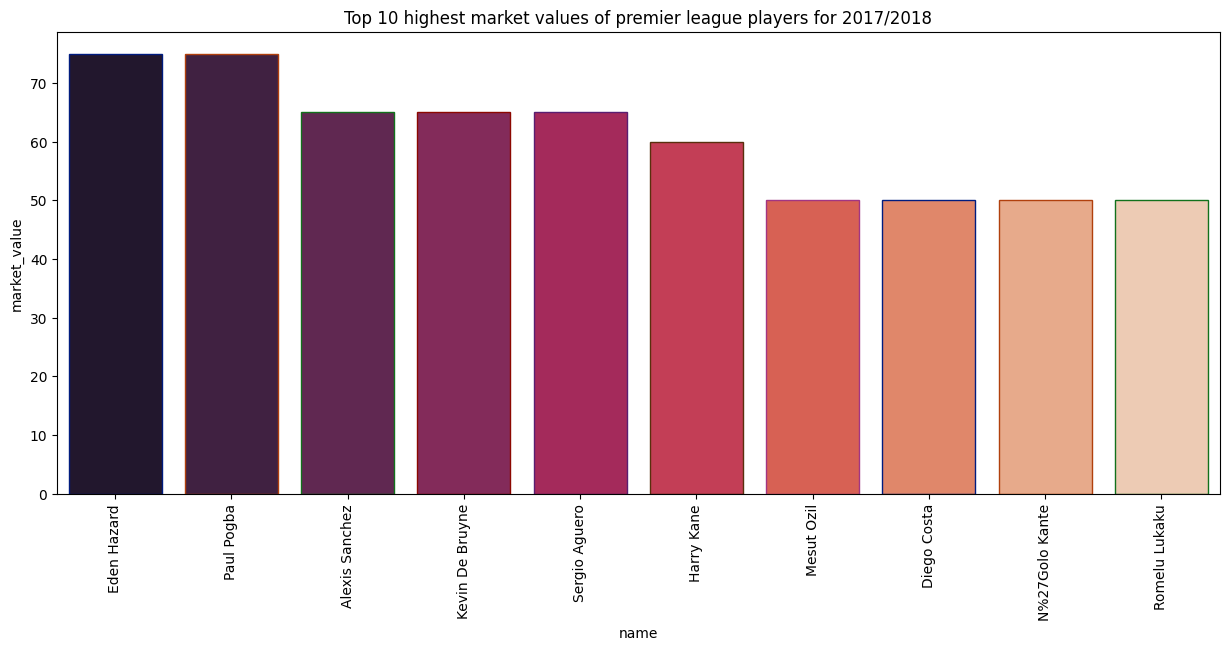

In [146]:
#most market value
dfmarketv = players.nlargest(10, 'market_value').sort_values('market_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x= "name", y="market_value",  data=dfmarketv ,palette='rocket',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Top 10 highest market values of premier league players for 2017/2018')
plt.show()

Bar chart above shows the top 10 biggest market value for each player. The x-axis represents players name while y-axis represent market value.

It appears that Eden Hazard and Paul Pogba have the biggest market value, which is 75. They are followed by Alexis Sanchez on the 3rd position. 

### ***Average Market Value of every club***

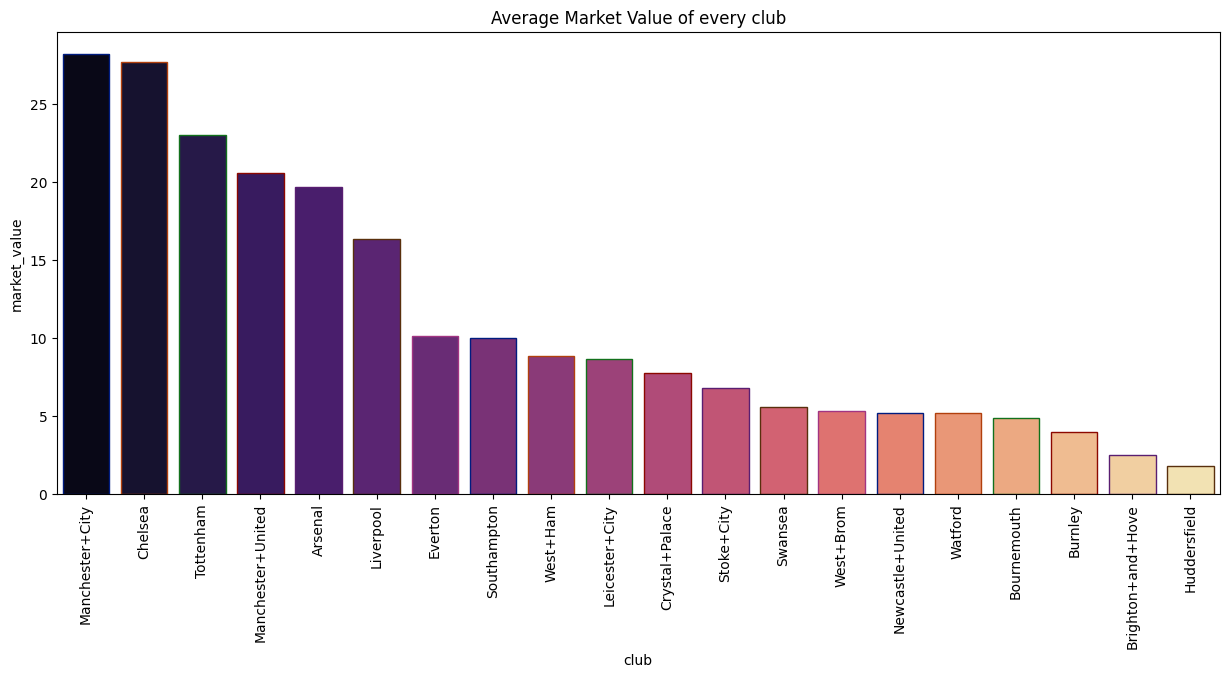

In [147]:
players_meanmv=pd.DataFrame(players.groupby(['club'])['market_value'].mean()).reset_index().sort_values('market_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="club", y="market_value",data=players_meanmv,palette='magma',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Average Market Value of every club')
plt.show()

Bar chart above shows sorted average of market value for each club. The x-axis represents clubs name while y-axis represent its average market value.

It appears that ManCity and Chelsea, which are famous for spending money for a star player have the biggest average market value. They are followed by Totenham on the 3rd position. Burnley, Brighton, and Huddersfield are sitting in the lowest 3.

### ***FPL 10 most valuable players***

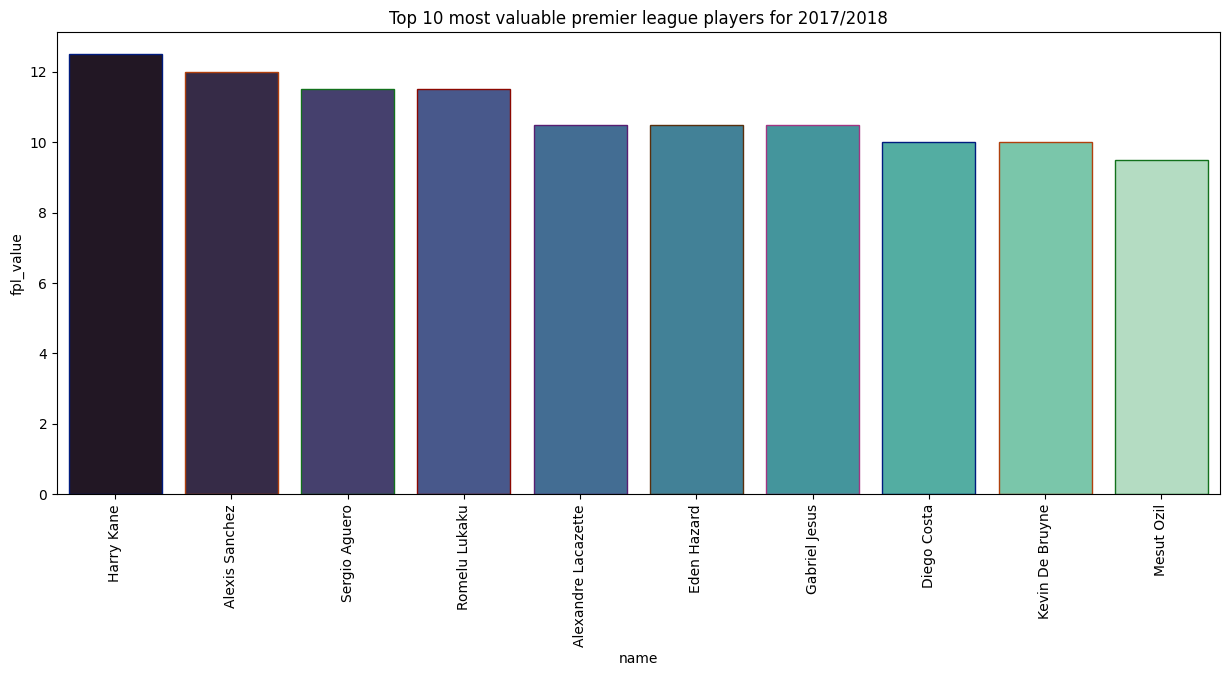

In [148]:
players_view = players.nlargest(10, 'fpl_value').sort_values('fpl_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="fpl_value",  data=players_view ,palette='mako',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Top 10 most valuable premier league players for 2017/2018')
plt.show()

Bar chart above shows the top 10 highest FPL value for each player. The x-axis represents players name while y-axis represent FPL value.

It appears that Harry Kane has the biggest FPL value, followed by Alexis Sanchez on the 2nd position. As it is shown in the graph above, there are 3 Belgium players that sit in this position, who are Eden Hazard, Kevin de Bruyne, and Romeru Lukaku while the FPL value top 10 position is dominated by foreign players. The only local player who is in this position is only Hary Kane.

### ***Average of FPL value for every club***

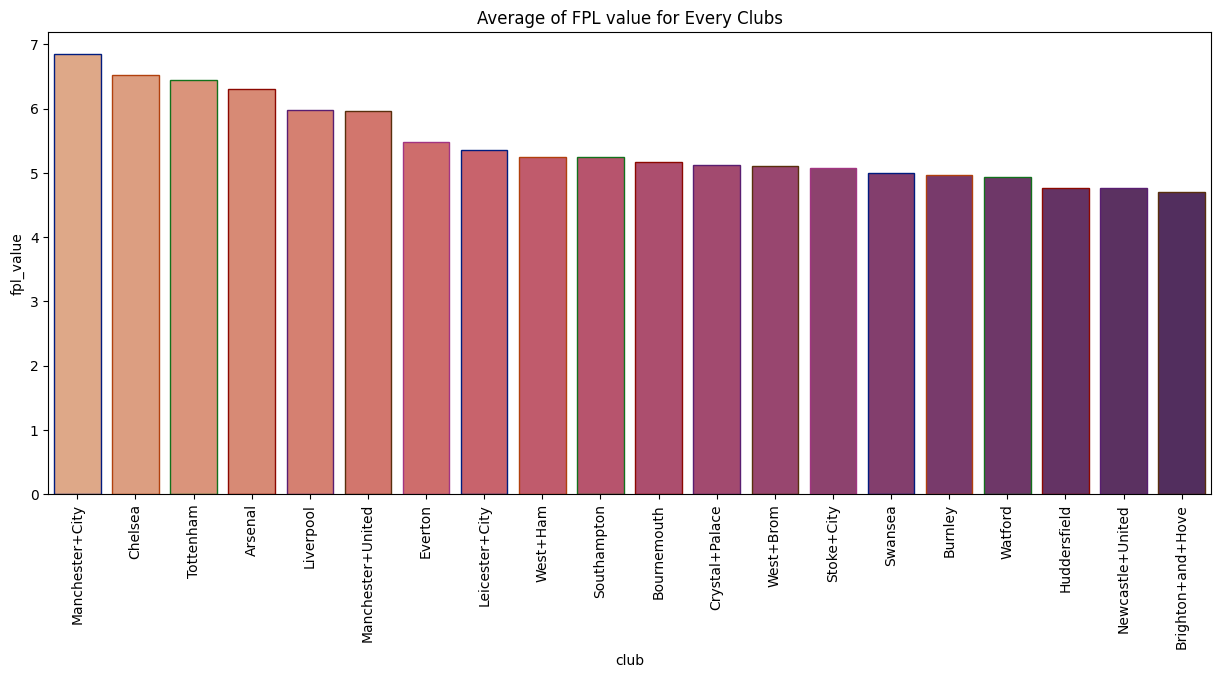

In [149]:
players_meanfv=pd.DataFrame(players.groupby(['club'])['fpl_value'].mean()).reset_index().sort_values('fpl_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="club", y="fpl_value",data=players_meanfv,palette='flare',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Average of FPL value for Every Clubs')
plt.show()

Bar chart above shows sorted average of FPL value for each club. The x-axis represents clubs name while y-axis represent its average FPL value.

It appears that ManCity and Chelsea have the biggest average market value. They are followed by Totenham on the 3rd position and the 3 promoted clubs are sitting in the lowest 3.

### ***Linear Regression***

In [150]:
players.drop(['name','club','position','nationality','fpl_sel','fpl_value','region'], axis=1,inplace=True)
players.head()

,age,position_cat,market_value,page_views,fpl_points,new_foreign,age_cat,club_id,big_club,new_signing
0,28,1,65.0,4329,264,0,4,1,1,0
1,28,1,50.0,4395,167,0,4,1,1,0
2,35,4,7.0,1529,134,0,6,1,1,0
3,28,1,20.0,2393,122,0,4,1,1,0
4,31,3,22.0,912,121,0,4,1,1,0


In [151]:
X=players.drop("market_value",axis=1)
y=players["market_value"]


In [152]:
X

,age,position_cat,page_views,fpl_points,new_foreign,age_cat,club_id,big_club,new_signing
0,28,1,4329,264,0,4,1,1,0
1,28,1,4395,167,0,4,1,1,0
2,35,4,1529,134,0,6,1,1,0
3,28,1,2393,122,0,4,1,1,0
4,31,3,912,121,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...
456,21,2,288,38,0,1,20,0,1
457,23,3,199,34,0,2,20,0,1
458,23,3,198,29,0,2,20,0,0
459,21,1,412,16,0,1,20,0,1


In [153]:
y

0      65.0
1      50.0
2       7.0
3      20.0
4      22.0
       ... 
456     5.0
457     7.0
458     4.5
459     1.0
460    10.0
Name: market_value, Length: 461, dtype: float64

### ***Data Preprocessing***

In [154]:
x_scaler = StandardScaler().fit_transform(X)

### ***Train, Test split***

In [155]:
X_train, X_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.3, random_state=78)

### ***Fitting and prediction***

In [156]:
linear_model = LinearRegression().fit(X_train, y_train)

In [157]:
y_pred = linear_model.predict(X_test)

### ***Model Evaluation***

In [158]:
r2_score(y_test, y_pred) * 100

73.67858232262874